# Linear Regression from Scratch – Insurance Cost Prediction

This notebook implements **Linear Regression from scratch using NumPy**, without relying on high-level ML libraries for model training.

The goal is to:
- Understand the mathematics behind linear regression
- Implement gradient descent manually
- Analyze the relationship between demographic features and medical insurance expenses

Only utility functions such as data loading and evaluation metrics are taken from external libraries.


In [1]:
# Numerical computation
import numpy as np 

# Data manipulation and analysis
import pandas as pd 

# Data visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Importing Required Libraries

We use:
- **NumPy** for implementing mathematical operations and gradient descent
- **Pandas** for dataset handling
- **Matplotlib** for visualizing relationships between variables

No machine learning libraries are used for training the model.


In [2]:
# Loading the Dataset
df = pd.read_csv('insurance.csv')

## Dataset Loading

The dataset contains demographic and lifestyle information along with corresponding medical insurance expenses.
This data will be used to build a regression model that predicts expenses.


## Exploratory Data Analysis (EDA)

In this section, we:
- Inspect the structure of the dataset
- Check for missing values
- Review statistical properties of numerical features
- Understand data types and feature distributions


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


### Relationship Between Age and Medical Expenses

This visualization helps identify whether medical expenses tend to increase with age.
A positive correlation would justify using age as an important feature in the regression model.


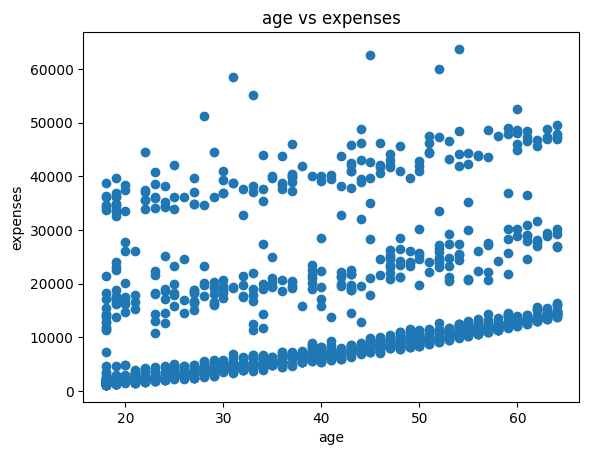

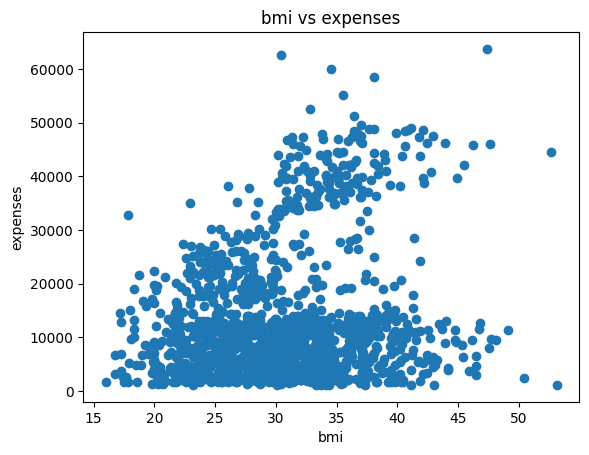

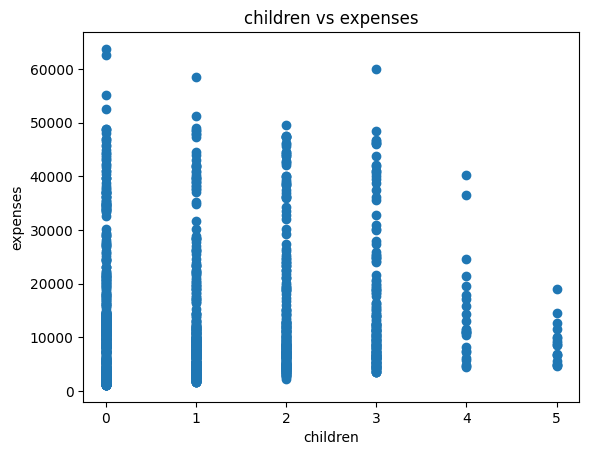

In [6]:
plt.scatter(df.age, df.expenses)
plt.xlabel('age')
plt.ylabel('expenses')
plt.title('age vs expenses')
plt.show()

plt.scatter(df.bmi, df.expenses)
plt.xlabel('bmi')
plt.ylabel('expenses')
plt.title('bmi vs expenses')
plt.show()

plt.scatter(df.children, df.expenses)
plt.xlabel('children')
plt.ylabel('expenses')
plt.title('children vs expenses')
plt.show()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
df.region.value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [10]:
df.sex.value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [11]:
sex_mapping = {
    'male':0,
    'female':1
}

smoker_mapping = {
    'yes':1,
    'no':0
}

In [12]:
df.smoker = df.smoker.map(smoker_mapping)
df.sex = df.sex.map(sex_mapping)

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86


In [14]:
df = pd.get_dummies(df, columns=['region'], drop_first=False)

In [15]:
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.9,0,1,16884.92,False,False,False,True
1,18,0,33.8,1,0,1725.55,False,False,True,False
2,28,0,33.0,3,0,4449.46,False,False,True,False
3,33,0,22.7,0,0,21984.47,False,True,False,False
4,32,0,28.9,0,0,3866.86,False,True,False,False


In [16]:
df = df.astype(int)

In [17]:
df.head()

,age,sex,bmi,children,smoker,expenses,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27,0,1,16884,0,0,0,1
1,18,0,33,1,0,1725,0,0,1,0
2,28,0,33,3,0,4449,0,0,1,0
3,33,0,22,0,0,21984,0,1,0,0
4,32,0,28,0,0,3866,0,1,0,0


In [18]:
# Separate features (X) and target variable (y)
y = df.expenses
X = df.drop(columns='expenses')

In [19]:
alpha = 0.0003

In [20]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Feature Scaling

Feature scaling is applied to improve convergence speed during gradient descent.
Without scaling, features with larger numerical ranges may dominate parameter updates.


In [21]:
# Feature scaling ensures all input features contribute equally to the gradient descent updates

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = ['age', 'bmi']

X[cols] = scaler.fit_transform(X[cols])

In [22]:
X.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,1,-0.524492,0,1,0,0,0,1
1,-1.509965,0,0.457692,1,0,0,0,1,0
2,-0.797954,0,0.457692,3,0,0,0,1,0
3,-0.441948,0,-1.342979,0,0,0,1,0,0
4,-0.513149,0,-0.360795,0,0,0,1,0,0


In [23]:
y.head()

0    16884
1     1725
2     4449
3    21984
4     3866
Name: expenses, dtype: int64

## Linear Regression from Scratch

In this section, linear regression is implemented manually using NumPy.

The model follows the equation:

\[
\hat{y} = Xw + b
\]

Where:
- \(X\) is the feature matrix
- \(w\) is the weight vector
- \(b\) is the bias term

Gradient descent is used to minimize the Mean Squared Error cost function.


In [24]:
m, n = X_train.shape
w_init = np.zeros(n)
b_init = 0.0

In [25]:
def prediction(X, w, b):
    y_hat = np.dot(X, w) + b

    return y_hat

In [26]:
def compute_error(y_hat, y):
    error = y_hat - y

    return error

In [27]:
def compute_cost(m, error):
    # Compute Mean Squared Error cost
    # J(w, b) = (1 / 2m) * Σ (ŷ - y)²
    cost = 0
    for i in range(m):
        cost += error[i]**2
    cost *= (1/(2*m))

    return cost

In [28]:
def compute_gradient(error, x):
    # Compute partial derivatives of the cost function
    # with respect to weights and bias
    m, n = x.shape

    dj_dw = np.zeros(n)
    dj_db = 0
    #Gradient w.r.t weight
    for i in range(m):
        for j in range(n):
            dj_dw[j] += error[i] * x[i, j]
        dj_db += error[i]

    dj_dw = dj_dw/m
    dj_db = dj_db/m

    return (dj_dw, dj_db)

In [29]:
def update_parameters(w, b, X_train, y_train, alpha):
    # Update parameters iteratively using gradient descent
    # Learning rate controls step size during optimization
    y_hat = np.dot(X_train, w) + b
    error = y_hat - y_train
    dj_dw, dj_db = compute_gradient(error, X_train)

    #Updating w
    w = w - (alpha * dj_dw)

    #Updating b
    b = b - (alpha * dj_db)

    return (w, b)

In [30]:
X_train = X_train.values
y_train = y_train.values

## Training the Linear Regression Model using Gradient Descent

This function trains the linear regression model by iteratively updating the
model parameters using gradient descent.

At each iteration:
- Model parameters are updated
- Predictions are computed
- Training error and cost are calculated
- Convergence is checked using a tolerance threshold

Training stops early if the improvement in cost becomes negligible.


In [31]:
def train_model(X_train, y_train, w_init, b_init, alpha, num_iters = 1000):
    """
    Trains a linear regression model using gradient descent.

    Parameters:
    X_train  -- Training feature matrix of shape (m, n)
    y_train  -- Target values of shape (m,)
    w_init   -- Initial weights vector
    b_init   -- Initial bias
    alpha    -- Learning rate
    num_iters-- Maximum number of iterations

    Returns:
    w            -- Learned weight vector
    b            -- Learned bias
    cost_history -- List storing cost value at each iteration
    """
    w = w_init
    b = b_init 
    cost_history = []

    for i in range(num_iters):

        w, b = update_parameters(w, b, X_train, y_train, alpha)

        y_hat = np.dot(X_train, w) + b
        error = y_hat - y_train 
        cost = compute_cost(len(y_train), error)
        cost_history.append(cost)

        if i > 0 and abs(cost_history[-2] - cost) < 1e-6:
            print(f"Converged at iteration {i}")
            break
    
    return w, b, cost_history

In [32]:
train_model(X_train, y_train, w_init, b_init, alpha)

(array([ 195.27861142, -119.74447754,  184.49988104,  161.50620274,
        1115.91100012,   14.82025485,  -49.86754063,   58.74709554,
         -72.14611817]),
 np.float64(-48.44630841079482),
 [np.float64(69563578.63761353),
  np.float64(65219516.764689356),
  np.float64(65006378.56681436),
  np.float64(64988838.620085485),
  np.float64(64980707.08677035),
  np.float64(64973167.56642798),
  np.float64(64965795.64726232),
  np.float64(64958564.31023382),
  np.float64(64951465.683484405),
  np.float64(64944493.13010679),
  np.float64(64937640.384284735),
  np.float64(64930901.49481761),
  np.float64(64924270.807621785),
  np.float64(64917742.95081582),
  np.float64(64911312.820631586),
  np.float64(64904975.568031795),
  np.float64(64898726.58599588),
  np.float64(64892561.49744033),
  np.float64(64886476.143742755),
  np.float64(64880466.573837325),
  np.float64(64874529.033855736),
  np.float64(64868659.957284175),
  np.float64(64862855.95561288),
  np.float64(64857113.80945077),
  n

In [33]:
w, b, cost_history = train_model(X_train, y_train, w_init, b_init, alpha, num_iters = 1000)

## Cost Function Convergence

The following plot shows how the cost function decreases over training
iterations.

A monotonically decreasing curve indicates that gradient descent is
successfully minimizing the cost function and converging to an optimal solution.


# Plot cost vs iterations on a logarithmic scale
# Log scale helps visualize convergence more clearly
plt.semilogy(cost_history)

plt.xlabel('interations')
plt.ylabel('cost')
plt.title('cost vs iterations')
plt.show()

In [35]:
y_final = np.dot(X_test, w) + b

In [36]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_final)
print(r2)

0.19466627135952697


## Model Evaluation

The trained model is evaluated using the R² score,
which indicates how much variance in the target variable
is explained by the model.


# Testing model with a sample input value

In [37]:
# Sample input representing a single individual
# Values must follow the same order and scaling as training data

sample = np.array([
    35,    # age
    1,     # sex (male=1)
    27.5,  # bmi
    2,     # children
    0,     # smoker (no=0)
    0,     # region_northeast
    0,     # region_northwest
    1,     # region_southeast
    0      # region_southwest
])


In [38]:
sample_scaled = sample.copy()
sample_scaled[[0, 2]] = scaler.transform(sample[[0, 2]].reshape(1, -1))[0]

In [39]:
y_sample = sample_scaled @ w + b
print(y_sample)


73.406270704203
